Author: Skyler Morris <br>

laughlinPotentials.ipynb: <br>
Working towards a braiding process for a $v = \frac{1}{3}$ FQH system on a cylinder <br>
using the full second quantized Hamiltonian on classical and quantum hardware. <br>

In [3]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "..")))
from tools.second_quantized.LaughlinImports import (laughlin_hamiltonian_sq, build_H_Matrix, openfermion_basis, 
                               supporting_configurations, laughlin_hamiltonian_qhPotential, 
                               ground_state, quasihole_ground_state,
                               laughlin_hamiltonian_q1q2Potentialss)
from scipy.linalg import eigh, expm
from openfermion import get_sparse_operator
import numpy as np
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt


Pure Laughlin State

$ \hat{H} = \sum_{j=0}^{N_{\phi}-1} \sum_{k>|m|} V_{k,m} c^{\dagger}_{j+m}c^{\dagger}_{j+k}c_{j+m+k}c_j\\$
$N_{\phi}=12$


In [19]:
Nphi = 12  
Nelec = 4
Lx = 4
kappa = 2*np.pi / Lx
basis_states = openfermion_basis(Nphi, Nelec)
print(basis_states)
basis_dict = {b: i for i, b in enumerate(basis_states)}
dim = len(basis_states)

E0, psi0 = ground_state(Nphi, Nelec, kappa, basis_states, dim)
print(E0[:5])
supporting_configurations(psi0, basis_states, Nphi, 3, .3)



[15, 23, 39, 71, 135, 263, 519, 1031, 2055, 27, 43, 75, 139, 267, 523, 1035, 2059, 51, 83, 147, 275, 531, 1043, 2067, 99, 163, 291, 547, 1059, 2083, 195, 323, 579, 1091, 2115, 387, 643, 1155, 2179, 771, 1283, 2307, 1539, 2563, 3075, 29, 45, 77, 141, 269, 525, 1037, 2061, 53, 85, 149, 277, 533, 1045, 2069, 101, 165, 293, 549, 1061, 2085, 197, 325, 581, 1093, 2117, 389, 645, 1157, 2181, 773, 1285, 2309, 1541, 2565, 3077, 57, 89, 153, 281, 537, 1049, 2073, 105, 169, 297, 553, 1065, 2089, 201, 329, 585, 1097, 2121, 393, 649, 1161, 2185, 777, 1289, 2313, 1545, 2569, 3081, 113, 177, 305, 561, 1073, 2097, 209, 337, 593, 1105, 2129, 401, 657, 1169, 2193, 785, 1297, 2321, 1553, 2577, 3089, 225, 353, 609, 1121, 2145, 417, 673, 1185, 2209, 801, 1313, 2337, 1569, 2593, 3105, 449, 705, 1217, 2241, 833, 1345, 2369, 1601, 2625, 3137, 897, 1409, 2433, 1665, 2689, 3201, 1793, 2817, 3329, 3585, 30, 46, 78, 142, 270, 526, 1038, 2062, 54, 86, 150, 278, 534, 1046, 2070, 102, 166, 294, 550, 1062, 2086, 198,

$N_{\phi}=9$

In [3]:
Nphi = 9   
Nelec = 3 
Lx = 4
kappa = 2*np.pi / Lx
basis_states = openfermion_basis(Nphi, Nelec)
print(basis_states)
basis_dict = {b: i for i, b in enumerate(basis_states)}
dim = len(basis_states)

E, psi0 = ground_state(Nphi, Nelec, kappa, basis_states, dim)
print(E)
supporting_configurations(psi0, basis_states, Nphi, 3, .3)



[7, 11, 19, 35, 67, 131, 259, 13, 21, 37, 69, 133, 261, 25, 41, 73, 137, 265, 49, 81, 145, 273, 97, 161, 289, 193, 321, 385, 14, 22, 38, 70, 134, 262, 26, 42, 74, 138, 266, 50, 82, 146, 274, 98, 162, 290, 194, 322, 386, 28, 44, 76, 140, 268, 52, 84, 148, 276, 100, 164, 292, 196, 324, 388, 56, 88, 152, 280, 104, 168, 296, 200, 328, 392, 112, 176, 304, 208, 336, 400, 224, 352, 416, 448]
[-0.      -0.      -0.       0.02872  0.02872  0.02872  0.02872  0.02872  0.02872  0.02872  0.02872  0.02872  0.02872  0.02872  0.02872  0.02882  0.02882  0.02882  0.02882  0.02882  0.02882  0.05754  0.05754  0.05754  0.05754  0.05754  0.05754  0.05754  0.05754  0.05754  0.29018  0.29018  0.29018  0.29018  0.29018  0.29018  0.29018  0.29018  0.29018  0.29018  0.29018  0.29018  0.29018  0.29018  0.29018  0.29018  0.29018  0.29018  0.29121  0.29121  0.29121  0.29121  0.29121  0.29121  0.29162  0.29162  0.29162  0.32143  0.32143  0.32143  0.32143  0.32143  0.32143  0.32143  0.32143  0.32143  0.32143  0.32143

/var/folders/3h/4j7_tmhd1qqc3__rk859nrjr0000gn/T/ipykernel_65858/1740371337.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_full = get_cmap("turbo", num_to_plot)


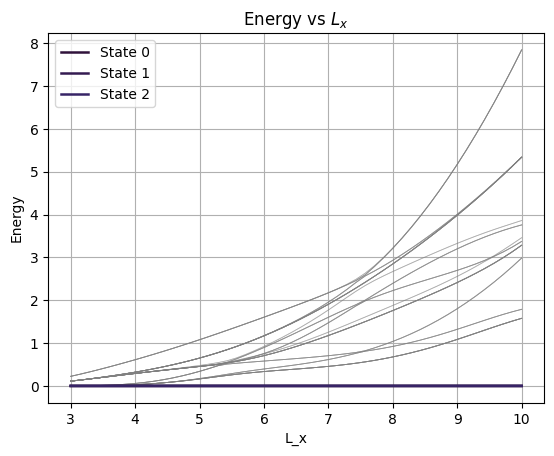

In [6]:
Nphi = 9  
Nelec = 3 
Lx = 5
kappa = 2*np.pi / Lx
Ly = 12
hx = 5
hy = 12
basis_states = openfermion_basis(Nphi, Nelec)
basis_dict = {b: i for i, b in enumerate(basis_states)}
dim = len(basis_states)
size = np.linspace(3,10)


spectrum = []
for Lx_step in size:
    kappa = 2 * np.pi / Lx_step
    E, psi = ground_state(Nphi, Nelec, kappa, basis_states, dim)
    spectrum.append(E)
spectrum = np.array(spectrum)


n_highlight = 3   
num_to_plot = len(E) 

cmap_full = get_cmap("turbo", num_to_plot)
fig, ax = plt.subplots()

for i in range(num_to_plot):
    ax.plot(size, spectrum[:, i], color="gray", alpha=0.3, linewidth=0.6)

for i in range(n_highlight):
    ax.plot(size, spectrum[:, i], color=cmap_full(i), linewidth=1.8, label=f"State {i}")

ax.set_title(r"Energy vs $L_x$")
ax.set_xlabel(r"L_x")
ax.set_ylabel("Energy")
ax.grid(True)
ax.legend()

plt.show()


Constructing $\hat{S}(L\prime(x), L(x))$, mapping thin cylinder states into entangled FQH liquid states.

In [6]:
Nphi = 9   
Nelec = 3 
Lx = 4
kappa = 2*np.pi / Lx
n_low = 3
delta_T = .01
T = delta_T * 10000
Delta = 2
epsilon = (Delta * delta_T) / T
n_steps = int(T / delta_T)

basis_states = openfermion_basis(Nphi, Nelec)
dim = len(basis_states)

H_list = []
for i in range(n_steps):
    L = Lx + i * epsilon
    kappa = 2 * np.pi / L
    H_op = laughlin_hamiltonian_sq(Nphi, kappa)
    H_full = get_sparse_operator(H_op, Nphi).tocsc()
    H_matrix = build_H_Matrix(H_full, basis_states, dim, Nphi).toarray()
    H_list.append(H_matrix)

_, eigvecs0 = np.linalg.eigh(H_list[0])
Psi0 = eigvecs0[:, :n_low]  

def evolve_subspace(H_list, Psi0, delta_t):
    Psi = Psi0.copy()
    for H in H_list:
        U_step = expm(-1j * delta_t * H)
        Psi = U_step @ Psi
    return Psi

Psi_evolved = evolve_subspace(H_list, Psi0, delta_T)

_, eigvecsF = np.linalg.eigh(H_list[-1])
PsiF = eigvecsF[:, :n_low]

overlaps_raw = np.abs(PsiF.conj().T @ Psi_evolved)**2
print("Overlaps (No Corrrection):")
print(overlaps_raw)

V = PsiF.conj().T @ Psi_evolved

Psi_aligned = Psi_evolved @ V.conj().T
overlaps_aligned = np.abs(PsiF.conj().T @ Psi_aligned)**2
print("\nGauge corrected overlaps:")
print(overlaps_aligned)


Overlaps (No Corrrection):
[[0.      0.99977 0.00012]
 [0.9999  0.      0.     ]
 [0.      0.00012 0.99977]]

Gauge corrected overlaps:
[[0.9998 0.     0.    ]
 [0.     0.9998 0.    ]
 [0.     0.     0.9998]]


In [11]:
Nphi = 10
Nelec = 3
Lx = 4
kappa = 2*np.pi / Lx
Ly = (Nphi * np.pi * 2) / Lx
hx = 4 * kappa
hy = 0
n_low = 3
delta_T = .01
T = delta_T * 10000
Delta = 2
epsilon = (Delta * delta_T) / T
n_steps = int(T / delta_T)

basis_states = openfermion_basis(Nphi, Nelec)
dim = len(basis_states)

H_list = []
for i in range(n_steps):
    L = Lx + i * epsilon
    kappa = 2 * np.pi / L
    H_op = laughlin_hamiltonian_qhPotential_coeff(Nphi, kappa, L, hx, hy, 20)
    H_full = get_sparse_operator(H_op, Nphi).tocsc()
    H_matrix = build_H_Matrix(H_full, basis_states, dim, Nphi).toarray()
    H_matrix = 100 * H_matrix
    H_list.append(H_matrix)

_, eigvecs0 = eigh(H_list[0])
Psi0 = eigvecs0[:, :n_low]  

def evolve_subspace(H_list, Psi0, delta_t):
    Psi = Psi0.copy()
    for H in H_list:
        U_step = expm(-1j * delta_t * H)
        Psi = U_step @ Psi
    return Psi

Psi_evolved = evolve_subspace(H_list, Psi0, delta_T)

_, eigvecsF = eigh(H_list[-1])
PsiF = eigvecsF[:, :n_low]

overlaps_raw = np.abs(PsiF.conj().T @ Psi_evolved)**2
print("Overlaps (No Corrrection):")
print(overlaps_raw)

V = PsiF.conj().T @ Psi_evolved

Psi_aligned = Psi_evolved @ V.conj().T
overlaps_aligned = np.abs(PsiF.conj().T @ Psi_aligned)**2
print("\nGauge corrected overlaps:")
print(overlaps_aligned)


Overlaps (No Corrrection):
[[0.13706 0.34936 0.51341]
 [0.14693 0.36645 0.48645]
 [0.71593 0.28403 0.00001]]

Gauge corrected overlaps:
[[0.99968 0.      0.     ]
 [0.      0.99965 0.     ]
 [0.      0.      0.99994]]


Laughlin Quasihole State with Pinning Potential at $h_x=2*\kappa$, $h_y=2*\kappa$ and $N_{\phi}=10$ 

In [5]:
Nphi = 10
Nelec = 3
Lx = 4
kappa = 2*np.pi / Lx
Ly = (Nphi * np.pi * 2) / Lx
hx = 2 * kappa
hy = 2 * kappa
#h2x = 2 * kappa
#h2y = 2 * kappa
basis_states = openfermion_basis(Nphi, Nelec)
print(basis_states)
basis_dict = {b: i for i, b in enumerate(basis_states)}
dim = len(basis_states)


#H_op = laughlin_hamiltonian_q1q2Potentialss(Nphi, kappa,Lx, hx, hy, h2x, h2y)
H_op = laughlin_hamiltonian_qhPotential(Nphi, kappa, hx, hy,)
H_full = get_sparse_operator(H_op, Nphi).tocsc()
H_matrix = build_H_Matrix(H_full, basis_states, dim, Nphi).toarray()
E0, psi0 = eigh(H_matrix)
print(E0)
supporting_configurations(psi0, basis_states, Nphi, 3, .4)

[7, 11, 19, 35, 67, 131, 259, 515, 13, 21, 37, 69, 133, 261, 517, 25, 41, 73, 137, 265, 521, 49, 81, 145, 273, 529, 97, 161, 289, 545, 193, 321, 577, 385, 641, 769, 14, 22, 38, 70, 134, 262, 518, 26, 42, 74, 138, 266, 522, 50, 82, 146, 274, 530, 98, 162, 290, 546, 194, 322, 578, 386, 642, 770, 28, 44, 76, 140, 268, 524, 52, 84, 148, 276, 532, 100, 164, 292, 548, 196, 324, 580, 388, 644, 772, 56, 88, 152, 280, 536, 104, 168, 296, 552, 200, 328, 584, 392, 648, 776, 112, 176, 304, 560, 208, 336, 592, 400, 656, 784, 224, 352, 608, 416, 672, 800, 448, 704, 832, 896]
[-0.      -0.       0.       0.00225  0.00234  0.00234  0.00244  0.02458  0.02666  0.02666  0.02872  0.02872  0.02872  0.02873  0.02873  0.02876  0.02879  0.02879  0.0288   0.0288   0.0288   0.02888  0.02889  0.03109  0.03109  0.05544  0.05544  0.05753  0.05754  0.05754  0.06613  0.06613  0.06615  0.09289  0.09289  0.25678  0.27094  0.27094  0.27162  0.27163  0.27164  0.27197  0.29015  0.29017  0.29018  0.29018  0.29018  0.29018

Energy Spectrum vs $L_x$ for <br> 
$\\ N_{\phi}=13$ and $h_x = 4 * \kappa$, $h_y = 2 * \kappa$

In [ ]:
Nphi = 13
Nelec = 4
Lx = 4
kappa = 2*np.pi / Lx
Ly = (Nphi * np.pi * 2) / Lx
hx = 4 * kappa
hy = 2 * kappa 

basis_states = openfermion_basis(Nphi, Nelec)
print(basis_states)
basis_dict = {b: i for i, b in enumerate(basis_states)}
dim = len(basis_states)
size = np.linspace(3,12,8)

spectrum = []
for Lx_step in size:
    kappa = 2 * np.pi / Lx_step
    Ly = (Nphi * np.pi * 2) / Lx
    hy = Ly/2
    E, psi = quasihole_ground_state(Nphi, Nelec, kappa, basis_states, dim, Lx_step, hx, hy)
    spectrum.append(E)
    print(Lx_step)
    print(E[:40])
    supporting_configurations(psi, basis_states, Nphi, 30, 0.1)
spectrum = np.array(spectrum)


n_highlight = 3
num_to_plot = len(psi)

cmap_full = get_cmap("turbo", 3)
fig, ax = plt.subplots()

for i in range(num_to_plot):
    ax.plot(size, spectrum[:, i], color="gray", alpha=0.3, linewidth=0.6)

for i in range(n_highlight):
    ax.plot(size, spectrum[:, i], color=cmap_full(i), linewidth=1.8, label=f"State {i}")

ax.set_title("Full Spectrum")
ax.set_xlabel("Lx")
ax.set_ylabel("Energy")
ax.grid(True)
ax.legend()
ax.set_ylim(-.25,10)
plt.show()
